In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
# Calculating completion time

def ct(df):
    add = 0
    c = 0
    for time in df['Burst Time']:
        add += time
        df['Completion Time'][c] = add
        c+=1

    df['Turn Around Time'] = df['Completion Time'] - df['Arrival Time']
    df['Waiting Time'] = df['Turn Around Time'] - df['Burst Time']
    return df


In [3]:
# manipulation of original dataframe for extracting tuples to be used in plotting chart
def manipulate(df):
    gantt = pd.DataFrame(df[['Completion Time','Burst Time']])
    x = gantt['Completion Time']
    x.drop(x.tail(1).index,inplace=True) # drop last n rows
    x.index = x.index + 1  
    x = pd.concat([pd.Series([0]), x])
    gantt['Completion Time'] = x
    return gantt




In [4]:
def slice_tuples(gantt):
    tups = gantt.apply(tuple, axis=1).tolist()
    return tups

In [5]:
# Importing the matplotlb.pyplot 

def chart(df,tups):
    # Declaring a figure "gnt" 
    fig, gnt = plt.subplots() 

    # Setting Y-axis limits 
    gnt.set_ylim(0, 30) 

    # Setting X-axis limits 
    gnt.set_xlim(0, 90) 

    # Setting labels for x-axis and y-axis 
    gnt.set_xlabel('Time') 
    gnt.set_ylabel('Processes') 

    # Setting ticks on y-axis 
    gnt.set_yticks(np.arange(20,150,20)) 
    # Labelling tickes of y-axis 
    gnt.set_yticklabels(df['Processes'].tolist()) 

    gnt.grid(True) 
    # Setting graph attribute 
    c = 15
    for x in range(len(tups)):
        if x == 0:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:blue')) 
        elif x == 1:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:red'))
        elif x == 2:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:orange'))
        elif x == 3:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:green'))    
        elif x == 4:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:purple'))
        elif x == 5:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:pink'))
        elif x == 6:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:white'))
        elif x == 7:
            gnt.broken_barh([tups[x]], (c, 10), facecolors =('tab:brown'))
        c += 20

#     gnt.broken_barh([tups[0]], (15, 9), facecolors =('tab:blue')) 
#     gnt.broken_barh([tups[1]], (35, 9), facecolors =('tab:blue')) 
#     gnt.broken_barh([tups[2]], (55, 9), facecolors =('tab:green')) 
#     gnt.broken_barh([tups[3]], (75, 9), facecolors =('tab:orange')) 
#     gnt.broken_barh([tups[4]], (95, 9), facecolors =('tab:purple'))
    plt.legend( df['Processes'] )
    plt.savefig("gantt1.png") 


In [23]:
def fcfs(df):
    df = ct(df)
    df1 = manipulate(df)
    tuples = slice_tuples(df1)
    chart(df,tuples)
    print("Average Waiting Time:",df["Waiting Time"].mean(),"\n","Average Turn Around Time:",df["Turn Around Time"].mean())
    return df

In [7]:
def sjf(df):
    df = df.sort_values(by=['Burst Time'], ascending=True)
    df.index = np.arange(len(df['Processes']))
    a = fcfs(df)
    return a

In [18]:
def details():
    number_of_processes = int(input("Enter Number Of Processes:"))
    bt = []
    for i in range(number_of_processes):
        bt.append(int(input("Enter Burst Time:")))

    data = {
        'Processes': np.arange(1,number_of_processes+1,1),
        'Arrival Time': np.zeros(number_of_processes,dtype=int),
        'Burst Time': np.array(bt),
        'Completion Time': np.ones(number_of_processes,dtype=int),
        'Turn Around Time':np.ones(number_of_processes,dtype=int),
        'Waiting Time':np.ones(number_of_processes,dtype=int)
    }
    df = pd.DataFrame(data)
    return df


In [17]:
def details_edf():
    number_of_processes = int(input("Enter Number Of Processes:"))
    bt = []
    dl = []
    for i in range(number_of_processes):
        bt.append(int(input("Enter Burst Time:")))
        dl.append(int(input("Enter Deadline:")))
    data = {
        'Processes': np.arange(1,number_of_processes+1,1),
        'Arrival Time': np.zeros(number_of_processes,dtype=int),
        'Burst Time': np.array(bt),
        'Deadline': np.array(dl),
        'Completion Time': np.ones(number_of_processes,dtype=int),
        'Turn Around Time':np.ones(number_of_processes,dtype=int),
        'Waiting Time':np.ones(number_of_processes,dtype=int)
    }
    df = pd.DataFrame(data)
    return df


Enter Number Of Processes:3
Enter Burst Time:10
Enter Burst Time:30
Enter Burst Time:20
Average Waiting Time: 16.666666666666668 
 Average Turn Around Time: 36.666666666666664


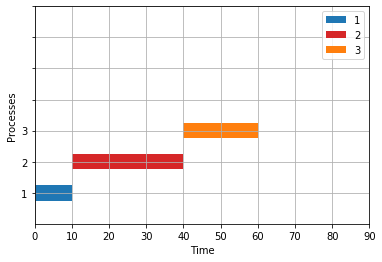

In [24]:
#fcfs
df = details()
a = fcfs(df)

In [25]:
a

,Processes,Arrival Time,Burst Time,Completion Time,Turn Around Time,Waiting Time
0,1,0,10,10,10,0
1,2,0,30,40,40,10
2,3,0,20,60,60,40


Enter Number Of Processes:3
Enter Burst Time:15
Enter Burst Time:5
Enter Burst Time:25
Average Waiting Time: 8.333333333333334 
 Average Turn Around Time: 23.333333333333332


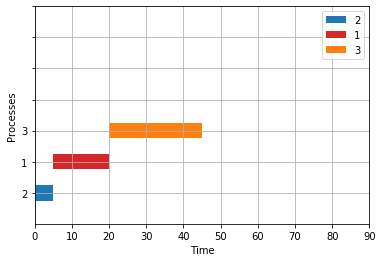

In [26]:
df = details()
b = sjf(df)


In [27]:
b

,Processes,Arrival Time,Burst Time,Completion Time,Turn Around Time,Waiting Time
0,2,0,5,5,5,0
1,1,0,15,20,20,5
2,3,0,25,45,45,20


In [28]:
def edf(df):
    df = df.sort_values(by=['Deadline'], ascending=True)
    df.index = np.arange(len(df['Processes']))
    a = fcfs(df)
    return a

Enter Number Of Processes:3
Enter Burst Time:12
Enter Deadline:2
Enter Burst Time:30
Enter Deadline:1
Enter Burst Time:105
Enter Deadline:3
Average Waiting Time: 24.0 
 Average Turn Around Time: 73.0


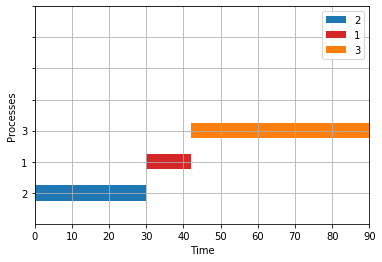

In [29]:
df = details_edf()
c = edf(df)

In [30]:
c

,Processes,Arrival Time,Burst Time,Deadline,Completion Time,Turn Around Time,Waiting Time
0,2,0,30,1,30,30,0
1,1,0,12,2,42,42,30
2,3,0,105,3,147,147,42
